## Задача 10.3 (3 задание)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.rc('font', **{'size' : 22})


Решаем уравнение переноса: $u_t+u_x = 0$

1) Схемой Лакса Вендроффа:
$\frac{y^{n+1}_m - y^n_m}{\tau} + a\frac{y^{n}_{m+1} - y^n_{m-1}}{2h} - \frac{a^2\tau}{2}\frac{y^{n}_{m+1} - 2y^n_m+y^n_{m-1}}{h^2} = 0$



Условия: 
1) u(x,0) = 1 (x <= 5) and u(x,0) = 0 5 <= x <=20
2) u(0,t) = 1

A: Посчитать для 41 точки при h = 0.5 до значения T = 9 (объяснить результат)

B: Сгустить сетку , что бы понять порядок сходимости

C: применить метод для чисел куранта $\tau/h$ = 1.0 , 0.6 , 0.

## A:

In [2]:
def Lax_Wendrof(points, tau , h , T):
    a = 1.0
    
    N = int(T/tau)
    M = len(points)
    print("N = ", N , "; M = " ,M)
    c = a*tau/h
    print("c =", c)

    result = np.zeros((N, M))
    
    # Границы
    result[0] = np.array([1.0 if i <= 5 else 0.0 for i  in points])
    result[:,0] = 1.0

    
    for n in range(N-1):
        for m in range(1, M-1):
            result[n+1, m] = result[n, m] - c*(result[n,m+1] - result[n,m-1] )/2  + c**2 *(result[n,m+1] - 2*result[n,m] + result[n,m-1])/2
        # result[n+1,M-1] = result[n+1,0]
    
    x = np.linspace(0, 1, M)
    t = np.linspace(0, 1, N)

    return x, t ,result

Метод не является устойчивым, потому имеет такой зигзагообразный вид

N =  9000 ; M =  41
c = 0.002


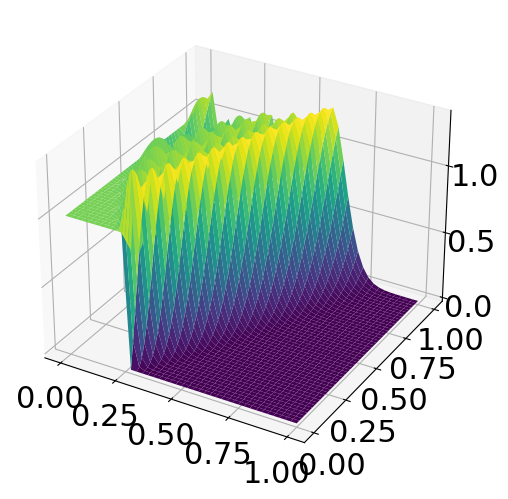

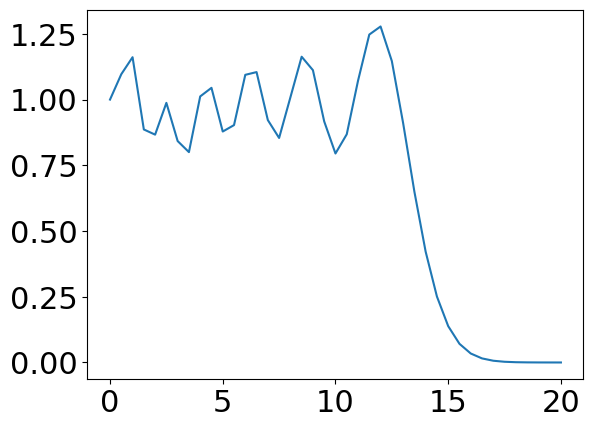

In [3]:
tau = 0.001
h = 0.5
T = 9
points = np.arange(0.0,20.1,h)

x , t , result = Lax_Wendrof(points , tau , h , T)
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, result, cmap='viridis')
plt.show()
plt.plot(points, result[-1])


## B:

#### Lax_wendrof

N =  900 ; M =  2010
c = 1.0
N =  900 ; M =  335
c = 0.16666666666666666
N =  900 ; M =  183
c = 0.09090909090909091
N =  900 ; M =  126
c = 0.062499999999999986
N =  900 ; M =  96
c = 0.047619047619047616
N =  900 ; M =  78
c = 0.038461538461538464
N =  900 ; M =  65
c = 0.032258064516129024
N =  900 ; M =  56
c = 0.027777777777777776
N =  900 ; M =  50
c = 0.024390243902439022
N =  900 ; M =  44
c = 0.021739130434782608


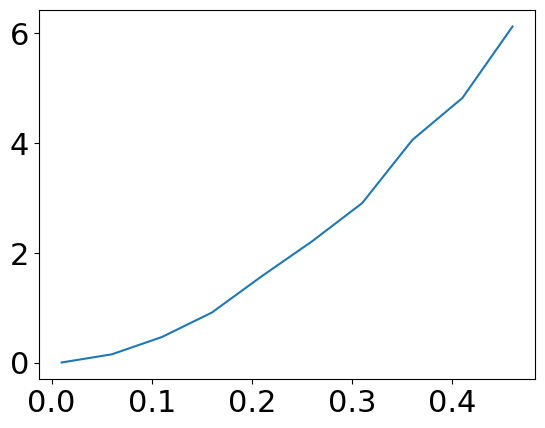

In [74]:
h_array = np.arange(0.01,0.5,0.05)
# h_array = [0.05 , 0.10]
tau = 0.01
err = []
for h in h_array :
    points = np.arange(0.0,20.1,h)
    x , t, result = Lax_Wendrof(points , tau , h , 9)
    u = np.zeros((len(x) , len(t)))
    ## Реальное решение
    for i in range(len(x)) :
        for j in range(len(t)) :
            x_0 = 20.1*i/len(x)
            t_0 = 9*j/len(t)
            # print(x_0,t_0)
            if x_0 < 5.0 + t_0 :
                u[i][j] = 1
    err.append(np.sum(np.abs((u.T-result)))*h**2*tau)
plt.plot(h_array,err)
plt.show()

In [71]:
print(err)

print(np.log2(err[0]/err[1]))

[0.3239899703286954, 0.5765871075375061]
-0.8315894259208237


Euler

In [44]:

def Euler(points, tau , h , T):
    a = 1.0

    N = int(T/tau)
    M = len(points)
    print("N = ", N , "; M = " ,M)
    c = a*tau/h
    print("c =", c)

    result = np.zeros((N, M))

    # Границы
    result[0] = np.array([1.0 if i <= 5 else 0.0 for i  in points])
    result[:,0] = 1.0


    for i in range(N-1):
        for j in range(1,M-1):
            result[i+ 1, j] = result[i, j] - c/2 * (result[i, j+1] - result[i, j-1])
            
    x = np.linspace(0, 1, M)
    t = np.linspace(0, 1, N)

    return x, t ,result 

Тестим Эйлера

N =  90 ; M =  41
c = 0.2


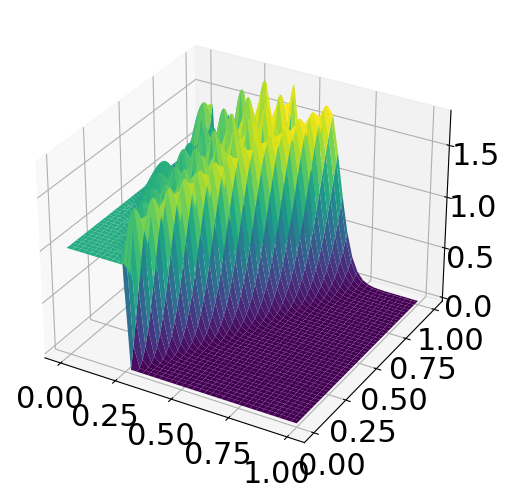

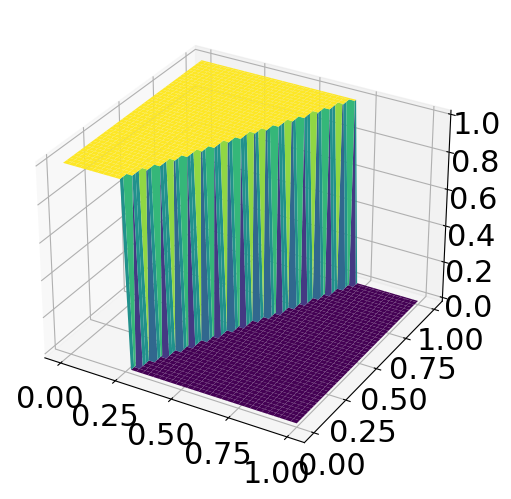

25.778875610883986


In [45]:
tau = 0.1
h = 0.5
T = 9
points = np.arange(0.0,20.1,h)

x , t, result = Euler(points , tau , h , T)
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, result, cmap='viridis')
plt.show()
u = np.zeros((len(x) , len(t)))

## Реальное решение
for i in range(len(x)) :
    for j in range(len(t)) :
        x_0 = 20.1*i/len(x)
        t_0 = 9*j/len(t)
        # print(x_0,t_0)
        if x_0 < 5.0 + t_0 :
            u[i][j] = 1
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, u.T, cmap='viridis')
plt.show()

print(np.sum(np.abs(u.T-result))*h*tau)

N =  9000 ; M =  201
c = 0.01
N =  9000 ; M =  134
c = 0.006666666666666666
N =  9000 ; M =  101
c = 0.004999999999999999
N =  9000 ; M =  81
c = 0.003999999999999999
N =  9000 ; M =  67
c = 0.003333333333333333
N =  9000 ; M =  58
c = 0.0028571428571428563
N =  9000 ; M =  51
c = 0.002499999999999999
N =  9000 ; M =  45
c = 0.002222222222222222
N =  9000 ; M =  41
c = 0.0019999999999999996
N =  9000 ; M =  37
c = 0.0018181818181818177
N =  9000 ; M =  34
c = 0.0016666666666666661
N =  9000 ; M =  31
c = 0.0015384615384615382
N =  9000 ; M =  29
c = 0.0014285714285714281
N =  9000 ; M =  27
c = 0.001333333333333333
N =  9000 ; M =  26
c = 0.0012499999999999998
N =  9000 ; M =  24
c = 0.0011764705882352938
N =  9000 ; M =  23
c = 0.001111111111111111
N =  9000 ; M =  22
c = 0.0010526315789473682


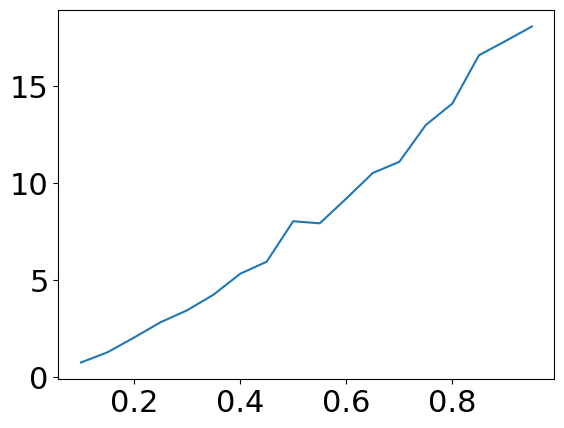

In [61]:
h_array = np.arange(0.1,1.0,0.05)
tau = 0.001
err = []
for h in h_array :
    points = np.arange(0.0,20.1,h)
    x , t, result = Euler(points , tau , h , 9)
    u = np.zeros((len(x) , len(t)))
    ## Реальное решение
    for i in range(len(x)) :
        for j in range(len(t)) :
            x_0 = 20.1*i/len(x)
            t_0 = 9*j/len(t)
            # print(x_0,t_0)
            if x_0 < 5.0 + t_0 :
                u[i][j] = 1
    err.append(np.sum(np.abs(u.T-result))*h**2*tau)
plt.plot(h_array,err)
plt.show()

N =  90 ; M =  81
c = 0.4


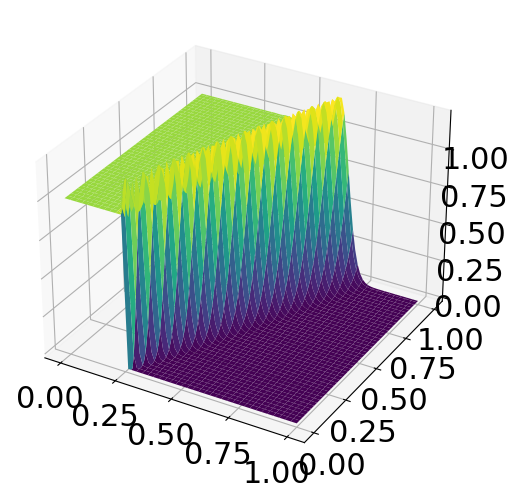

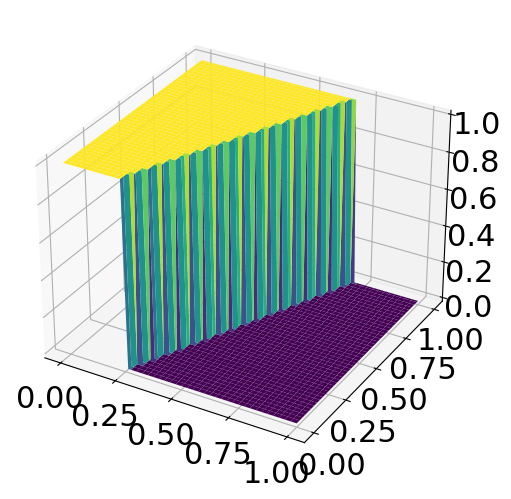

4.509657505947921


In [22]:
tau = 0.1
h = 0.25
T = 9
points = np.arange(0.0,20.1,h)

x , t, result = Lax_Wendrof(points , tau , h , T)
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, result, cmap='viridis')
plt.show()
u = np.zeros((len(x) , len(t)))

## Реальное решение
for i in range(len(x)) :
    for j in range(len(t)) :
        x_0 = 20.1*i/len(x)
        t_0 = 9*j/len(t)
        # print(x_0,t_0)
        if x_0 < 5.0 + t_0 :
            u[i][j] = 1
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, u.T, cmap='viridis')
plt.show()

print(np.sum(np.abs(u.T-result))*h*tau)


In [ ]:
tau = 0.001
h = 0.5
T = 9
points = np.arange(0.0,20.1,h)

x , t , result = Lax_Wendrof(points , tau , h , T)

## C :

N =  180 ; M =  402
c = 1.0


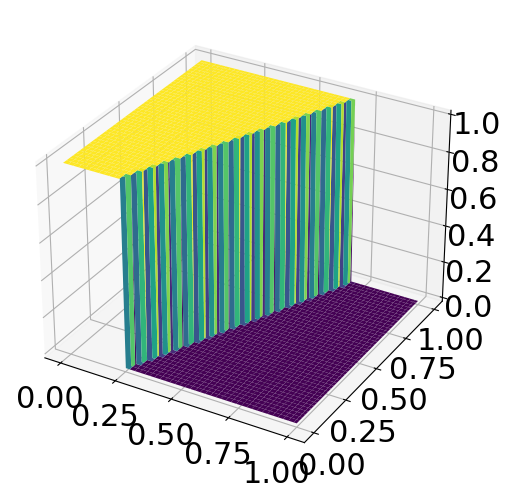

N =  300 ; M =  402
c = 0.6


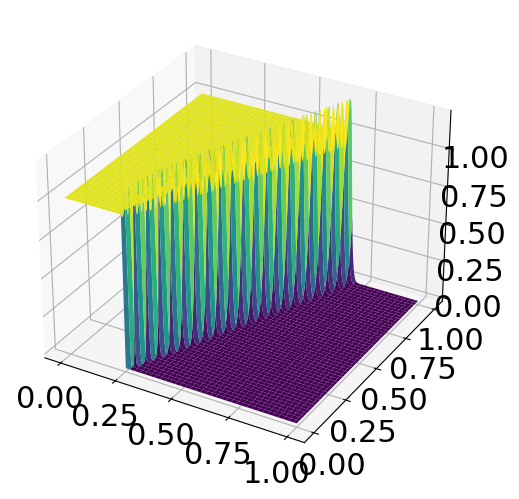

N =  1799 ; M =  402
c = 0.10000000000000002


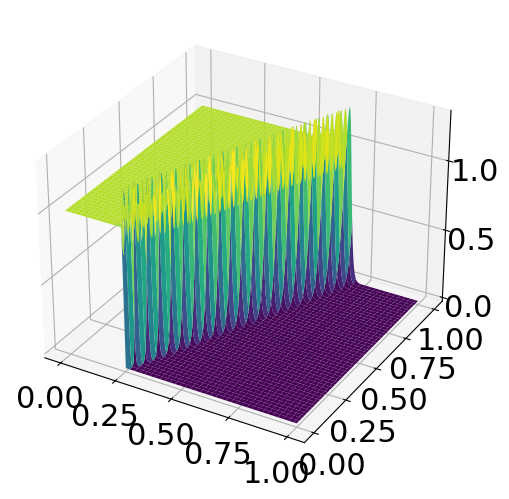

In [30]:
h = 0.05
tau_1 = 1.0*h
tau_2 = 0.6*h
tau_3 = 0.1*h
M = 9
points = np.arange(0.0,20.1,h)
x , t, result = Lax_Wendrof(points , tau_1 , h , M)
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, result, cmap='viridis')
plt.show()

points = np.arange(0.0,20.1,h)
x , t, result = Lax_Wendrof(points , tau_2 , h , M)
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, result, cmap='viridis')
plt.show()

points = np.arange(0.0,20.1,h)
x , t, result = Lax_Wendrof(points , tau_3 , h , M)
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, result, cmap='viridis')
plt.show()